# Sets

In [25]:
{1,2,3}

{1, 2, 3}

In [26]:
{1,3,2,3,3}

{1, 2, 3}

In [29]:
my_set = {"a", 2, (1,2)}

In [30]:
my_set.add("a")

In [31]:
my_set

{2, 'a', (1, 2)}

# Static methods and classmethods

In [33]:
from math import sin, cos, pi, sqrt
class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    @classmethod
    def from_polar(cls, r, phi):
        return cls(r * cos(phi),
                   r * sin(phi))
    @staticmethod
    def r(p):
        return sqrt(p.x**2 + p.y**2)
Point.from_polar(1, pi)

In [34]:
Point.r(Point.from_polar(1.5, pi/2))

1.5

## More special methods

In [27]:
class PointWithAccess(Point):
    def __init__(self, x, y):
        super(PointWithAccess, self).__init__(x, y)
    def __getitem__(self, i):
        if i == 0:
            return self.x
        elif i == 1:
            return self.y
        else:
            raise KeyError
    def __iter__(self):
        yield self.x
        yield self.y

In [28]:
p = PointWithAccess(1, 2)
print p

Point, x = 1, y = 2


In [29]:
p[0], p[1]

(1, 2)

In [30]:
[i for i in p]

[1, 2]

# Generators

In [1]:
def get_messages():
    messages = {'One message.', 'Another message.'}
    while messages:
        yield messages.pop()

In [2]:
get_messages()

<generator object get_messages at 0x7f66e35b9eb0>

In [3]:
[i for i in get_messages()]

['One message.', 'Another message.']

In [4]:
i = get_messages()

In [6]:
next(i)

'One message.'

In [7]:
i.next()

'Another message.'

In [8]:
next(i)

StopIteration: 

# Error handling

In [23]:
class MeanValue(object):
    n = 0
    total = 0
    def put(self, x):
        n += 1
        total += x
    def get(self):
        if self.n == 0:
            raise ValueError('No values stored!')
        else:
            return self.total / self.n

In [24]:
m = MeanValue()

In [25]:
m.get()

ValueError: No values stored!

In [26]:
mean = None
try:
    mean = m.get()
except ValueError as e:
    print e

No values stored!


# Scipy / Numpy

**Numpy** provides:

- An `array` class.
- Random sampling.
- Legacy stuff.

**Scipy** provides:

- Interpolation.
- Optimizaiton.
- Numerical integration.
- Fourier transformaions.
- Signal processing.
- Linear algebra.

In [1]:
import numpy as np
import scipy as sp

In [4]:
np.array(range(10), dtype=np.int16)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)

In [5]:
np.array(range(10), dtype=np.float32)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.], dtype=float32)

In [6]:
np.arange(0, 10, .5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

In [8]:
np.array(range(10)) ** np.array(range(10))

array([        1,         1,         4,        27,       256,      3125,
           46656,    823543,  16777216, 387420489])

## Why arrays?

In [22]:
my_array = np.random.standard_normal(1000)
%timeit sum(my_array**2)

10000 loops, best of 3: 126 µs per loop


In [23]:
my_list = list(my_array)
%timeit sum([i**2 for i in my_array])

1000 loops, best of 3: 469 µs per loop


In [28]:
y = np.random.standard_normal(10)

In [29]:
x = np.arange(10)

In [30]:
x,y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0.30534528, -0.13735209, -0.76739274,  0.54162726, -2.39361375,
         0.3224624 , -1.77004347, -1.73053663,  0.27928154,  2.02906537]))

In [35]:
%matplotlib inline

In [36]:
import matplotlib.pylab as plt

# Interpolation

## Splines

A spline $S$ is a piecewise polynomial function on an interval [a, b], i.e. there exists an $n$ and $x_i \in [a,b]$ with $a = x_0 < x_2 < \ldots < x_n = b$, such that

$\left. S\right|_{[x_{i-1}, x_i)} = P_i, \quad i = 1,\ldots, n$

with $P_i$ polynomial and $P_i(x_i) = P_{i+1}(x_i)$.

In [32]:
from scipy.interpolate import interp1d

In [33]:
S = interp1d(x,y,kind='cubic')

In [39]:
S(x)

array([ 0.30534528, -0.13735209, -0.76739274,  0.54162726, -2.39361375,
        0.3224624 , -1.77004347, -1.73053663,  0.27928154,  2.02906537])

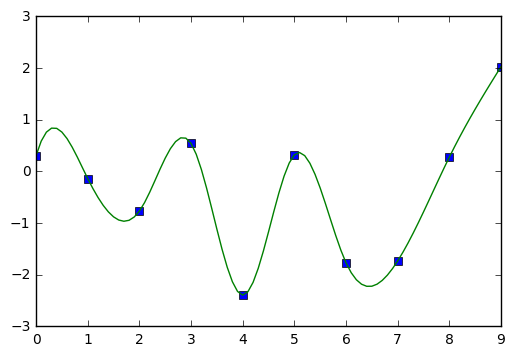

In [51]:
plt.plot(x, y, 's', np.arange(0,9.1,.1), S(np.arange(0,9.1,.1)), "-")

http://www.aavso.org/data-download

# Intergration

We now numerically approximate

$$\int_2^5 S(x) {\rm d}x\,.$$


In [53]:
from scipy.integrate import quad

In [54]:
quad(S, 2, 5)

(-2.0428122646329725, 2.2679772111821845e-15)

# Differential equations

In [8]:
from scipy.integrate import odeint

$$\theta''(t) + b\theta'(t) + c \sin(\theta(t)) = 0$$
$$\Leftrightarrow \theta'(t) = \omega(t), \quad \omega'(t) = -b \omega(t) - c \sin(\theta(t)$$

In [9]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [10]:
b,c = 0.25, 5

In [27]:
y0 = [np.pi - .01, 0.0]

In [28]:
t = np.arange(0, 10, 0.1)

In [29]:
solution = odeint(pend, y0, t, args=(b, c))

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

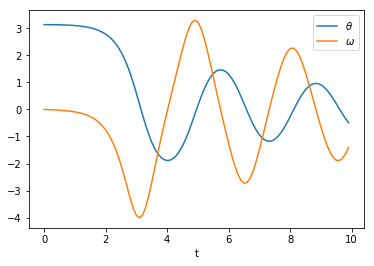

In [31]:
plt.plot(t, solution[:, 0], label=r'$\theta$')
plt.plot(t, solution[:, 1], label=r'$\omega$')
plt.legend()
plt.xlabel('t')

# Optimization

## Least-square fitting

Let $f_\theta: \mathbb{R} \rightarrow \mathbb{R}$, $\theta \in \mathbb{R}^k$ be a family of functions, e.g.

$$f_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2\,.$$

Let $x_i, y_i, i = 1,\ldots,n$ be observations of some kind, e.g. temperatures $y$ measuread at times $x$.

Our **objective** is to find

$$\theta^* = \underset{\theta}{\rm argmin} \sum_i \left(y_i - f_\theta(x_i)\right)^2\,.$$

In [124]:
import scipy.optimize

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [50]:
boston = np.recfromtxt('../data/housing.tsv', names=True)

In [42]:
pd.read_csv('../data/housing.tsv', sep='\s+').cov()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716


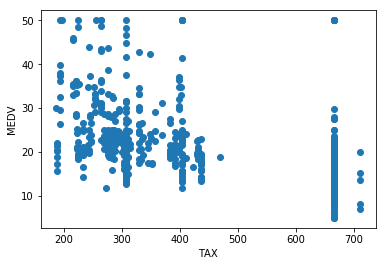

In [59]:
plt.scatter(boston.TAX, boston.MEDV)
plt.xlabel("TAX")
plt.ylabel("MEDV")

In [49]:
f = lambda x, a, b: a*x + b

In [54]:
(a, b), _ = scipy.optimize.curve_fit(f, boston.TAX, boston.MEDV)

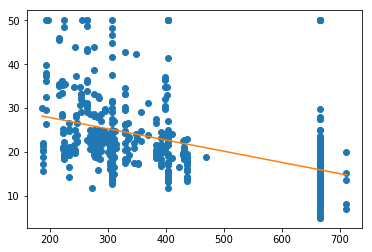

In [61]:
plt.plot(boston.TAX, boston.MEDV, 'o')
x = np.linspace(boston.TAX.min(), boston.TAX.max(), 100)
plt.plot(x, f(x, a, b))

In [62]:
g = lambda x, a, b, c: a*x**2 + b*x + c

In [63]:
(i,j,k), _ = scipy.optimize.curve_fit(g, boston.TAX, boston.MEDV)

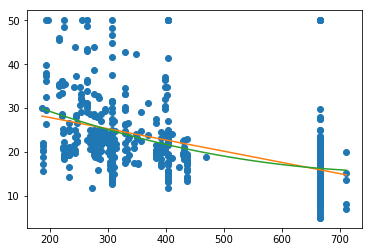

In [64]:
plt.plot(boston.TAX, boston.MEDV, 'o')
x = np.linspace(boston.TAX.min(), boston.TAX.max(), 100)
plt.plot(x, f(x, a, b))
plt.plot(x, g(x, i, j, k))

In [67]:
h = lambda theta, x: theta[0] + x*theta[1] + x*x*theta[2]
errfn = lambda theta: sum((boston.MEDV - h(theta, boston.TAX))**2)
params = scipy.optimize.minimize(errfn, [1,1,1])

In [68]:
params

      fun: 33115.183508000366
 hess_inv: array([[  1.21315621e-01,  -5.89356864e-04,   6.18178976e-07],
       [ -5.89356864e-04,   2.92357885e-06,  -3.10506530e-09],
       [  6.18178976e-07,  -3.10506530e-09,   3.33714504e-12]])
      jac: array([ -2.92968750e-03,   1.18652344e-01,   7.22485352e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 140
      nit: 9
     njev: 26
   status: 2
  success: False
        x: array([  3.94579900e+01,  -5.82804329e-02,   3.52145633e-05])

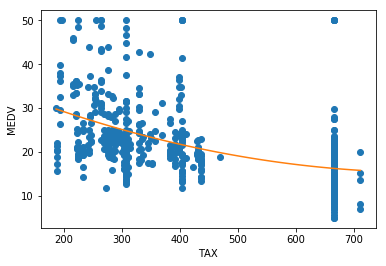

In [70]:
plt.plot(boston.TAX, boston.MEDV, 'o')
plt.plot(x, h(params.x, x))
plt.xlabel("TAX")
plt.ylabel("MEDV")

# Fourier transform

$$y_k = \sum_j e^{-2 \pi i \frac {kj} N} x_j$$

Heart series data: http://ecg.mit.edu/time-series/


In [55]:
heart_1 = np.genfromtxt('data/hr_series_1.txt')
heart_2 = np.genfromtxt('data/hr_series_2.txt')

In [58]:
from scipy.fftpack import fft

In [121]:
y_1, y_2 = [abs(fft(i)[1:200])**2 for i in (heart_1, heart_2)]

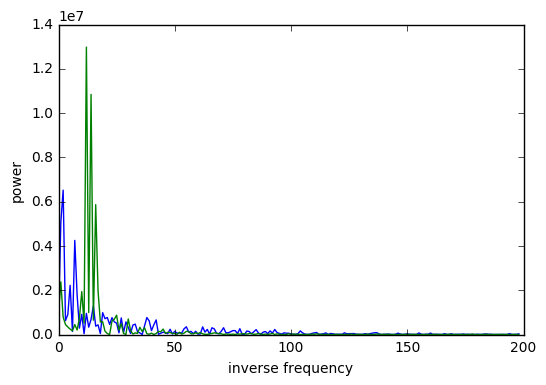

In [123]:
plt.plot(y_1)
plt.plot(y_2)
plt.xlabel("inverse frequency")
plt.ylabel("power")